In [1]:
import pandas as pd
import numpy as np

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from IPython.display import Image

#Library for building machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Reading the data and creating the dataframe
df = pd.read_csv("telco.csv", sep=',', header=0)

In [3]:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [4]:
# Getting info of the whole original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [5]:
# The number of unique variables
df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Under 30                                2
Senior Citizen                          2
Married                                 2
Dependents                              2
Number of Dependents                   10
Country                                 1
State                                   1
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Population                           1569
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                  

In [6]:
# Dropping the variables we don't need
df=df.drop(["Country", "State", "Quarter", "Customer ID", "Offer", "Internet Type", "Customer Status", "Churn Score", "CLTV",
           "Latitude", "Longitude", "Under 30", "Total Long Distance Charges", "Total Revenue", "Total Charges", "Churn Category",
            "Churn Reason", "City", "Zip Code", "Satisfaction Score", "Referred a Friend", "Dependents"], axis=1)

In [7]:
# New info after dropping the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Population                         7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Phone Service                      7043 non-null   object 
 11  Avg Monthly Long Distance Charges  7043 non-null   float

In [8]:
# Changing yes/no to 1/0 etc.
df["Gender"] = df["Gender"].replace({"Male" : 1, "Female" : 0})
df["Senior Citizen"] = df["Senior Citizen"].replace({"Yes" : 1, "No" : 0})
df["Married"] = df["Married"].replace({"Yes" : 1, "No" : 0})
df["Phone Service"] = df["Phone Service"].replace({"Yes" : 1, "No" : 0})
df["Multiple Lines"] = df["Multiple Lines"].replace({"Yes" : 1, "No" : 0})
df["Internet Service"] = df["Internet Service"].replace({"Yes" : 1, "No" : 0})
df["Online Security"] = df["Online Security"].replace({"Yes" : 1, "No" : 0})
df["Online Backup"] = df["Online Backup"].replace({"Yes" : 1, "No" : 0})
df["Device Protection Plan"] = df["Device Protection Plan"].replace({"Yes" : 1, "No" : 0})
df["Premium Tech Support"] = df["Premium Tech Support"].replace({"Yes" : 1, "No" : 0})
df["Streaming TV"] = df["Streaming TV"].replace({"Yes" : 1, "No" : 0})
df["Streaming Movies"] = df["Streaming Movies"].replace({"Yes" : 1, "No" : 0})
df["Streaming Music"] = df["Streaming Music"].replace({"Yes" : 1, "No" : 0})
df["Unlimited Data"] = df["Unlimited Data"].replace({"Yes" : 1, "No" : 0})
df["Paperless Billing"] = df["Paperless Billing"].replace({"Yes" : 1, "No" : 0})
df["Churn Label"] = df["Churn Label"].replace({"Yes" : 1, "No" : 0})

df["Contract"] = df["Contract"].replace({"Month-to-Month" : 0, "One Year" : 1, "Two Year" : 2})
df["Payment Method"] = df["Payment Method"].replace({"Bank Withdrawal" : 0, "Credit Card" : 1, "Mailed Check" : 2})

C:\Users\danie\AppData\Local\Temp\ipykernel_8648\1260125249.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male" : 1, "Female" : 0})
C:\Users\danie\AppData\Local\Temp\ipykernel_8648\1260125249.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Senior Citizen"] = df["Senior Citizen"].replace({"Yes" : 1, "No" : 0})
C:\Users\danie\AppData\Local\Temp\ipykernel_8648\1260125249.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   int64  
 3   Married                            7043 non-null   int64  
 4   Dependents                         7043 non-null   int64  
 5   Number of Dependents               7043 non-null   int64  
 6   Population                         7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   int64  
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Phone Service                      7043 non-null   int64  
 11  Avg Monthly Long Distance Charges  7043 non-null   float

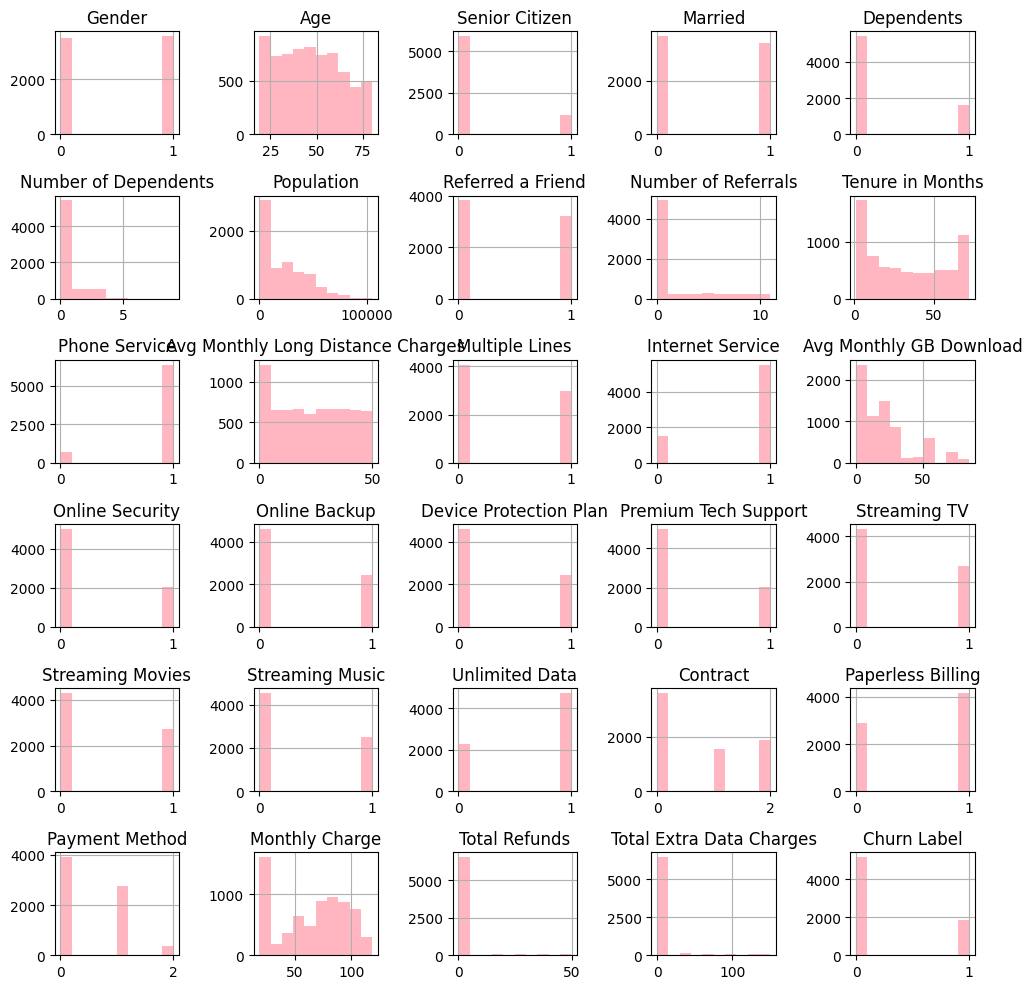

In [10]:
# Creating hstograms of the numerical variables (all)
df.hist(figsize=(10,10), color="lightpink")
plt.tight_layout()

In [11]:
# Seeing other stats of the variables
df.describe()

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Population,Referred a Friend,Number of Referrals,Tenure in Months,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Total Extra Data Charges,Churn Label
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,46.509726,0.162147,0.483033,0.231010,0.468692,22139.603294,0.457476,1.951867,32.386767,...,0.387903,0.353259,0.673719,0.754792,0.592219,0.499645,64.761692,1.962182,6.860713,0.265370
std,0.500013,16.750352,0.368612,0.499748,0.421508,0.962802,21152.392837,0.498224,3.001199,24.542061,...,0.487307,0.478016,0.468885,0.848468,0.491457,0.599483,30.090047,7.902614,25.104978,0.441561
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,2344.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000,0.000000,0.000000
50%,1.000000,46.000000,0.000000,0.000000,0.000000,0.000000,17554.000000,0.000000,0.000000,29.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,70.350000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,0.000000,1.000000,0.000000,0.000000,36125.000000,1.000000,3.000000,55.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,89.850000,0.000000,0.000000,1.000000
max,1.000000,80.000000,1.000000,1.000000,1.000000,9.000000,105285.000000,1.000000,11.000000,72.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,118.750000,49.790000,150.000000,1.000000


In [12]:
# Counting the values of the Churn Label variable
churncounts = df["Churn Label"].value_counts()
churncounts

Churn Label
0    5174
1    1869
Name: count, dtype: int64

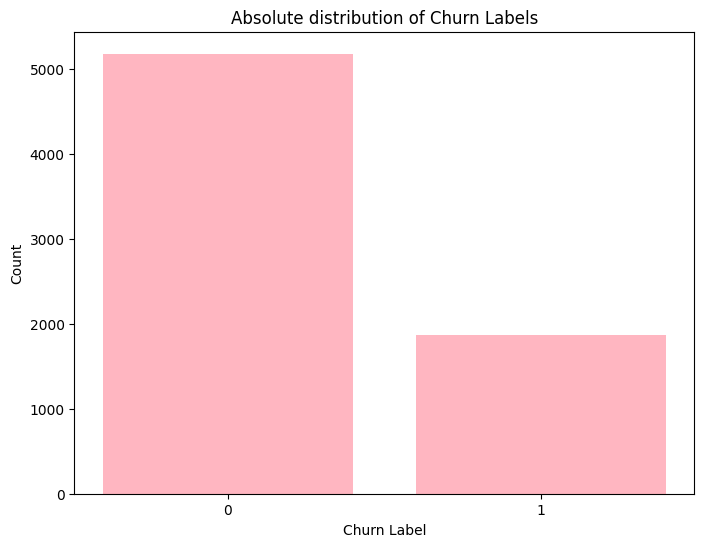

In [13]:
plt.figure(figsize=(8,6))
plt.bar(churncounts.index, churncounts.values, color="lightpink")
plt.title("Absolute distribution of Churn Labels")
plt.xlabel("Churn Label")
plt.ylabel("Count")
plt.xticks(churncounts.index)
plt.show()

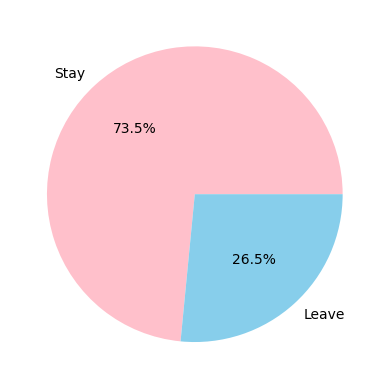

In [14]:
# Pie chart
plt.pie(churncounts, labels=["Stay", "Leave"], autopct="%1.1f%%", colors=["pink", "skyblue"]);

In [15]:
# Using one-hot encoding, making dummy variables of the two categorical variables we have
df = pd.get_dummies(df, columns=[
    "Contract",
    "Payment Method"
])

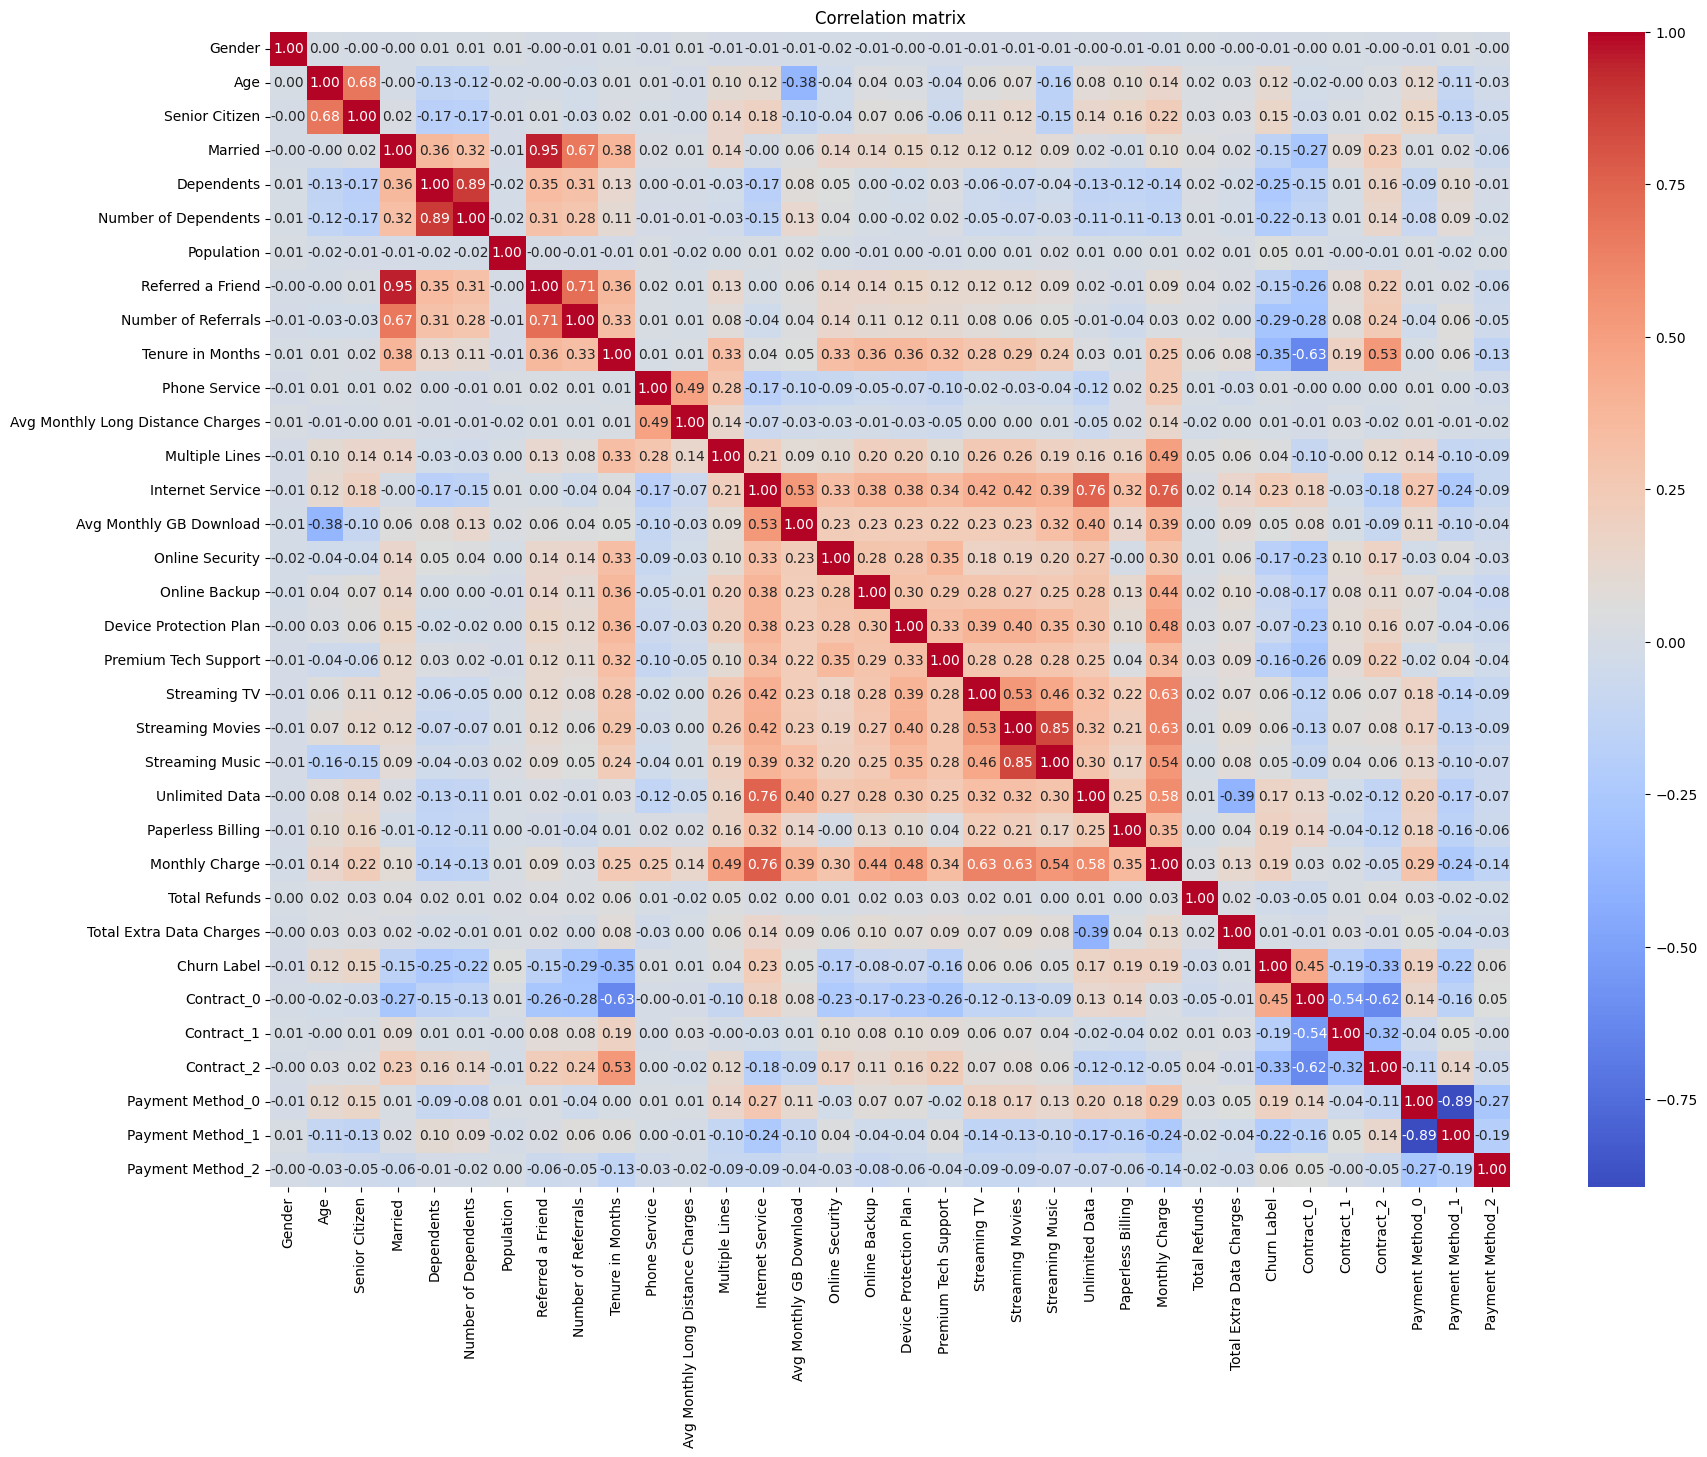

In [16]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [17]:
# Creating sets X and y 
X = df.drop(["Churn Label"], axis=1)
y = df["Churn Label"]

In [18]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.4)

In [19]:
# Calculating the values for y in the original, training and test set
original = y.value_counts(normalize=True)*100
train_dist = y_train.value_counts(normalize=True)*100
test_dist = y_test.value_counts(normalize=True)*100

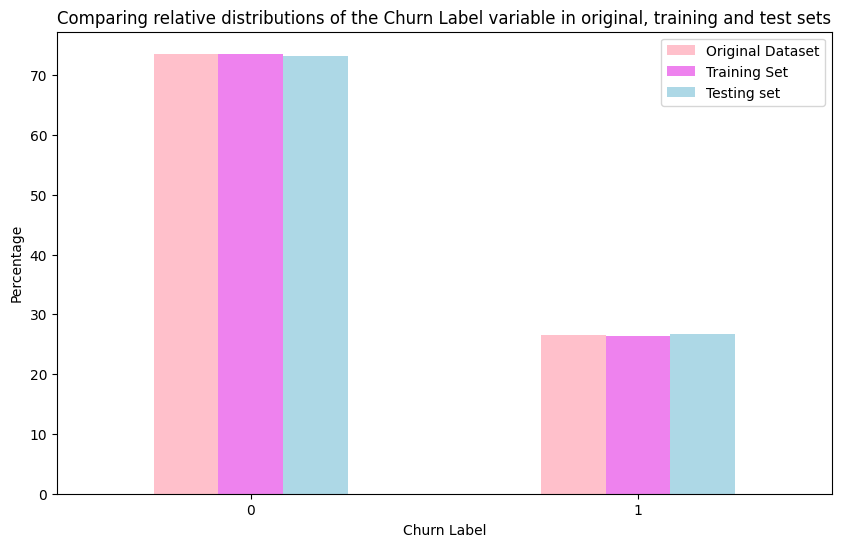

In [20]:
# Creating a dataframe of these values
dist_data = pd.DataFrame({"Original Dataset": original, "Training Set": train_dist, "Testing set": test_dist})

# Making a chart of the relative distributions of Churn Label variable in different sets
colors = ["pink", "violet", "lightblue"]
dist_data.plot(kind="bar", figsize=(10,6), color=colors)
plt.title("Comparing relative distributions of the Churn Label variable in original, training and test sets")
plt.xlabel("Churn Label")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

# Defining the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Creating the base model
model_tree = DecisionTreeClassifier(random_state=1234)

# Inner cross-validation for hyperparameter tuning
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

# Grid Search
grid_search = GridSearchCV(estimator=model_tree, param_grid=param_grid, cv=inner_cv, scoring="f1")

# Outer cross-validation for model evaluation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

# Performing nested cross-validation
nested_scores = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, scoring="f1")

# Printing nested cross-validation results
print(f"Nested CV F1 Scores: {nested_scores}")
print(f"Average Nested CV F1 Score: {np.mean(nested_scores)}")

# Fitting the model with the best hyperparameters on the entire training dataset
grid_search.fit(X_train, y_train)

# Extracting the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Nested CV F1 Scores: [0.64141414 0.64608076 0.65446224 0.62295082 0.71300448]
Average Nested CV F1 Score: 0.6555824896098292
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 30}


In [22]:
# Decision tree with the hyperparameters defined in the previous step
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=30,
                       random_state=1234)

In [23]:
# Storing column names into a variable
column_names = X_train.columns

In [24]:
# Creating DOT data
dot_data = tree.export_graphviz(best_model, out_file=None, 
                                feature_names=column_names, 
                                class_names=["stay", "leave"], filled=True)

# Drawing the graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("tree.png")

# Showing the graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [25]:
# Getting the feature importances
importances = best_model.feature_importances_

# Creating a dataframe of the features and their importances
feature_importance_df = pd.DataFrame({
    "Feature": column_names,   # Use your feature names from the dataset
    "Importance": importances
})

# Sorting the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Printing the DataFrame to view feature importances
feature_importance_df

,Feature,Importance
27,Contract_0,0.361151
1,Age,0.138804
8,Number of Referrals,0.114150
24,Monthly Charge,0.097704
9,Tenure in Months,0.089547
6,Population,0.035884
7,Referred a Friend,0.023111
11,Avg Monthly Long Distance Charges,0.021556
4,Dependents,0.021261
14,Avg Monthly GB Download,0.020763


In [26]:
# Predictions of the decision tree classifier
y_pred_tree = best_model.predict(X_test)

In [27]:
# Accuracy score
accuracy_score(y_test, y_pred_tree)

0.8206341694273545

In [28]:
# Precision score
precision_score(y_test, y_pred_tree)

0.6773584905660377

In [29]:
# Recall score
recall_score(y_test, y_pred_tree)

0.6331569664902998

In [30]:
# F1-score
f1_score(y_test, y_pred_tree)

0.6545123062898814

Text(0.5, 1.0, 'Decision tree')

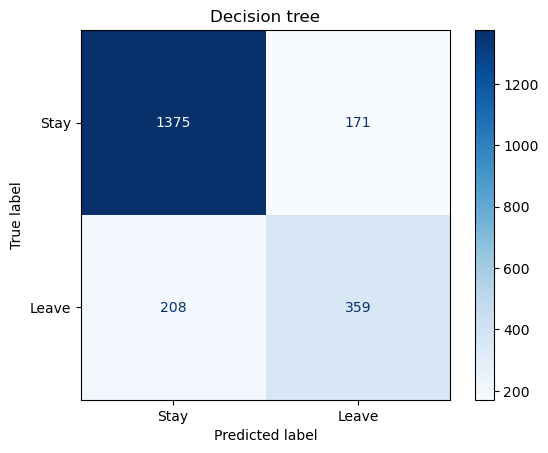

In [31]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap="Blues", display_labels=["Stay", "Leave"])
plt.title("Decision tree")

Text(0.5, 1.0, 'Decision tree (normalized)')

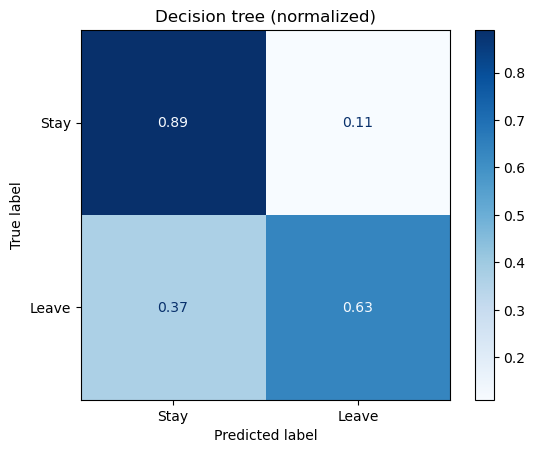

In [32]:
# Normalized confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap="Blues", normalize="true", display_labels=["Stay", "Leave"])
plt.title("Decision tree (normalized)")

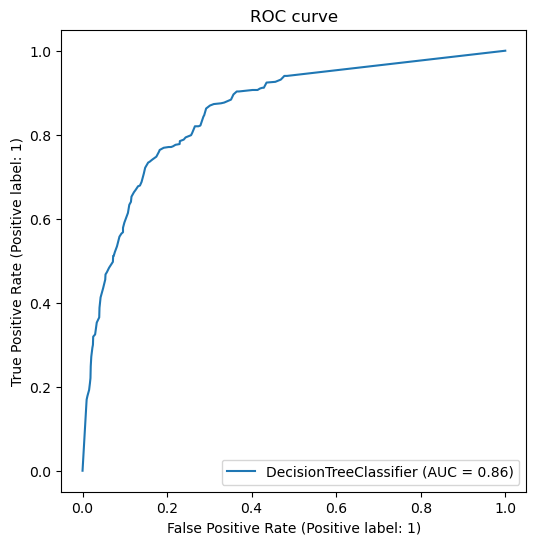

In [33]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("ROC curve")
RocCurveDisplay.from_estimator(best_model, X_test, y_test,ax=ax)